## Datacamp: Exploratory Data Analysis in Python Notebook

### Part 4 Notebook: Multivariate Thinking

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

## Multiple Regression:

In [7]:
brfss = pd.read_hdf('Data/brfss.hdf5', 'brfss')

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [8]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355, intercept_stderr=0.01319646754409372)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


In [13]:
# Income and education
gss = pd.read_hdf('Data/gss.hdf5', 'gss')

results = smf.ols('realinc ~ educ', data = gss).fit()
print(results.params)

# Add Age
results = smf.ols('realinc ~ educ + age', data = gss).fit()
print(results.params)

Intercept   -11539.147837
educ          3586.523659
dtype: float64
Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


In [19]:
# Futher explore income and age using groupby

grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

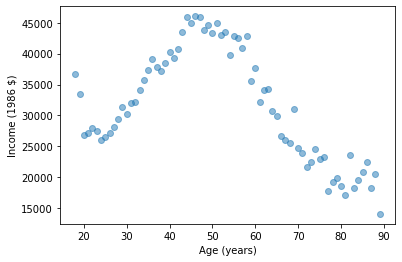

In [20]:
# Plot income by age group

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

In [21]:
# Add quadratic term that has non-linear relationship

gss['age2'] = gss['age']**2

model = smf.ols('realinc ~ educ + age + age2', data = gss)
results = model.fit()
print(results.params)

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64


In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [22]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


### Predictions

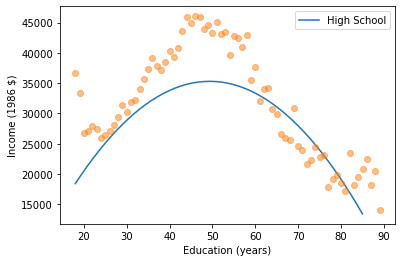

In [27]:
# Create DF and assign values

df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age']**2

df['educ'] = 12
df['educ2'] = df['educ']**2

# Results predict function
pred12 = results.predict(df)

#Plot predictions by age
plt.plot(df['age'], pred12, label='High School')
plt.plot(mean_income_by_age, 'o', alpha=.5)  #Variable from previous excercise
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [30]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


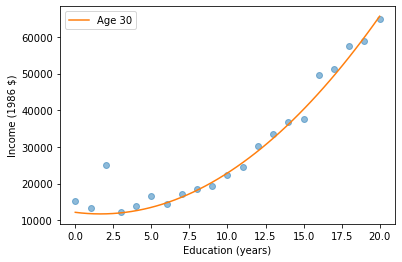

In [31]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Logistic Regression:

In [33]:
# Using Sex as constant variable
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'

results = smf.ols(formula, data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64


In [41]:
#Question GSS survey: "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?"
# 1 = "favor", 2 = "oppose"

#This survey question is not asking the question correctly. The question posed is do you "support or oppose"--This is not a 'yes' or 'no' question
#A much simpler question would be to only ask if they favor the law, or if they oppose it. Or simply have the answers 'favor', and 'oppose'.

gss['gunlaw'].value_counts()

#replace results
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

#Logistic regression
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

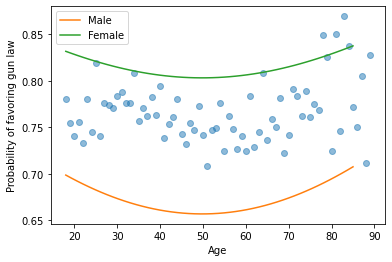

In [46]:
# Generate predictions

# Create DF and assign values
df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['educ'] = 12

df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

#Define men as 1, women as 2 and predict for sex
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

# Plot predictions as funtion of age
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()

plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')





plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


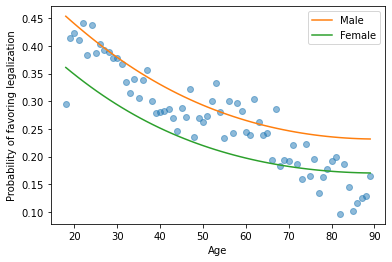

In [47]:
# Final Exercise: Exploring the factors that predict support for legalizing marijuana.

# Recode 'grass'
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()